In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('test.csv')
data = data.dropna()
# To-do list
# Always perform EDA
# If null, incomplete, preprocessing
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [9]:
X = data['x']
Y = data['y']

In [11]:
# Split data into traning and testing 
training_x, testing_x , training_y , testing_y = train_test_split(X,Y, test_size=0.25)

In [17]:
# Y = ax + b 

In [43]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def prediction(self, train_data):
        a = self.parameters['a']
        b = self.parameters['b']
        predictions = np.multiply(a, train_data) + b
        return predictions
    def cost_function(self, predictions, train_output):
        cost = np.mean((predictions - train_output)**2)
        return cost
    def back_propagation(self, train_data, train_ouput, predictions):
        #derivative
        derivatives = {}
        da = 2*np.mean(np.multiply(predictions-train_ouput, train_data))
        db = 2*np.mean(predictions-train_ouput)
        derivatives['da'] = da
        derivatives['db'] = db
        return derivatives
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['a'] = self.parameters['a'] - learning_rate*derivatives['da']
        self.parameters['b'] = self.parameters['b'] - learning_rate*derivatives['db']
        
    def train(self, train_data, train_output, learning_rate, iters):
        # Random starting 
        self.parameters['a'] = np.random.uniform(0,1) * -1
        self.parameters['b'] = np.random.uniform(0,1) * -1
        self.loss = []
        
        def update(iteration):
            predictions = self.prediction(train_data)    
            cost = self.cost_function(predictions, train_output)
            derivatives = self.back_propagation(train_data, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(iteration + 1, cost))

        i = 0
        while i < iters:
            update(i)
            i += 1
        
        return self.parameters, self.loss

In [44]:
linear_regression = LinearRegression()

In [46]:
parameters, loss = linear_regression.train(training_x, training_y, 0.0001, 50)

Iteration = 1, Loss = 11922.935159663419
Iteration = 2, Loss = 1667.8580285076544
Iteration = 3, Loss = 239.68362172219676
Iteration = 4, Loss = 40.78875754164262
Iteration = 5, Loss = 13.089639032790728
Iteration = 6, Loss = 9.232114173529473
Iteration = 7, Loss = 8.694891378929272
Iteration = 8, Loss = 8.620070803381994
Iteration = 9, Loss = 8.60964672226135
Iteration = 10, Loss = 8.608190826181742
Iteration = 11, Loss = 8.607983885767137
Iteration = 12, Loss = 8.607950881721049
Iteration = 13, Loss = 8.607942101367266
Iteration = 14, Loss = 8.607936694954043
Iteration = 15, Loss = 8.60793175883845
Iteration = 16, Loss = 8.607926888644307
Iteration = 17, Loss = 8.607922028056077
Iteration = 18, Loss = 8.607917169230921
Iteration = 19, Loss = 8.607912311076575
Iteration = 20, Loss = 8.60790745344087
Iteration = 21, Loss = 8.607902596302575
Iteration = 22, Loss = 8.607897739658693
Iteration = 23, Loss = 8.60789288350876
Iteration = 24, Loss = 8.60788802785267
Iteration = 25, Loss = 8.6

In [ ]:
# Evaluation

In [23]:
parameters

{'a': -0.5838838787377266, 'b': -0.27478753050352067}

In [50]:
def linear(x):
    return parameters['a'] * x + parameters['b']

In [51]:
predicted = list(map(linear,training_x))

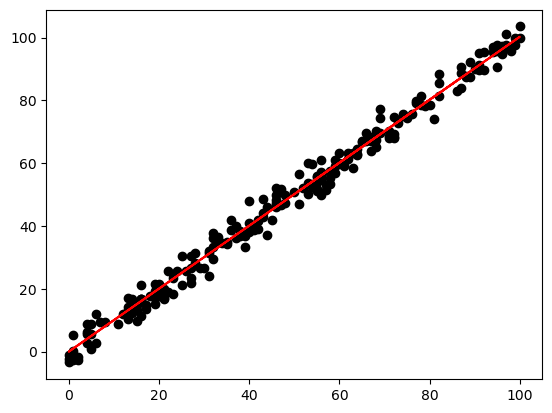

In [53]:
plt.scatter(training_x,training_y, color='black')
plt.plot(training_x, predicted, color='red')

In [54]:
linear(200)

200.47593448297965